In [1]:
!pip install gymnasium

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 953.9/953.9 kB 9.9 MB/s eta 0:00:00


In [2]:
import gymnasium as gym
import numpy as np
import random
import time

# FrozenLake-v1

In [3]:
env1 = gym.make('FrozenLake-v1', render_mode="rgb_array")

In [4]:
# Initialize Q-value table randomly
q_table1 = np.zeros((env1.observation_space.n, env1.action_space.n))
print(q_table1)

[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


In [5]:
# Hyperparameters
gamma = 0.99
learning_rate = 0.1
max_epsilon = 1.0
min_epsilon = 0.01
epsilon_decay_rate = 0.005

num_episodes = 20000
num_steps_per_episode = 100 # Each environment can have a different episode length

# Q Learning

In [6]:
def q_learning(env, num_episodes, num_steps_per_episode, learning_rate, gamma, max_epsilon, min_epsilon, epsilon_decay_rate):
    start = time.time()
    q_table = np.zeros((env.observation_space.n, env.action_space.n))
    rewards_all = []
    for episode in range(num_episodes):
        state, _ = env.reset()

        reward_episode = 0.0
        done = False
        epsilon = min_epsilon + (max_epsilon - min_epsilon) * np.exp(-epsilon_decay_rate*episode)
        for step in range(num_steps_per_episode):
            exploration = random.uniform(0,1)
            if exploration < epsilon:
                action = env.action_space.sample()
            else:
                action = np.argmax(q_table[state, :])

            next_state, reward, terminated, truncated, _ = env.step(action)
            q_table[state, action] = q_table[state, action] * (1 - learning_rate) + learning_rate * (reward + gamma * np.max(q_table[next_state,:]))

            reward_episode += reward
            state = next_state

            if terminated or truncated:
                done = True

            if done:
                break
        rewards_all.append(reward_episode)
    end = time.time()
    print(f'Episode {episode} finished')
    return q_table, rewards_all, (end-start)

In [7]:
q_table1, rewardsQ1, timeQ1 = q_learning(env1, num_episodes, num_steps_per_episode, learning_rate, gamma, max_epsilon, min_epsilon, epsilon_decay_rate)

Episode 19999 finished


In [8]:
print(sum(rewardsQ1))
print(sum(rewardsQ1[0:1000]))
print(sum(rewardsQ1[1000:2000]))
print(sum(rewardsQ1[2000:3000]))
print(sum(rewardsQ1[9000:10000]))
print(sum(rewardsQ1[19000:20000]))

12747.0
166.0
380.0
547.0
691.0
696.0


In [9]:
from IPython import display as ipythondisplay
import matplotlib.pyplot as plt

In [10]:
def play(env, q_table, render=False):
    state, _ = env.reset()
    total_reward = 0
    steps = 0
    done = False

    if render:
        plt.axis('off')

    while not done:
        action = np.argmax(q_table[state, :])
        next_state, reward, terminated, truncated, _ = env.step(action)
        total_reward += reward
        steps += 1
        if render:
            print(f"{state} --> {next_state}")
            time.sleep(0.5)
            # screen = env.render(mode='rgb_array')
            screen = env.render()
            plt.imshow(screen)
            ipythondisplay.clear_output(wait=True)
            ipythondisplay.display(plt.gcf())
            time.sleep(0.1)

        if terminated or truncated:
            done = True

        state = next_state

    return (total_reward, steps)

In [11]:
def play_multiple_times(env, q_table, max_episodes):
    success = 0
    list_of_steps = []
    for i in range(max_episodes):
        total_reward, steps = play(env, q_table)

        if total_reward > 0:
            success += 1
            list_of_steps.append(steps)

    print(f'Number of successes: {success}/{max_episodes}')
    print(f'Average number of steps: {np.mean(list_of_steps)}')

In [12]:
# play(env1, q_table1, render=True)

In [13]:
def plot(window, rewards1, label1, rewards2=None, label2=None, title=None):
    average_y1 = []
    average_y2 = []

    for ind in range(len(rewards1) - window + 1):
        average_y1.append(np.mean(rewards1[ind:ind + window]))
    for ind in range(window - 1):
        average_y1.insert(0, np.nan)
    if rewards2 is not None:
        for ind in range(len(rewards2) - window + 1):
            average_y2.append(np.mean(rewards2[ind:ind + window]))
        for ind in range(window - 1):
            average_y2.insert(0, np.nan)
    plt.figure(figsize=(10, 5))
    plt.plot(np.arange(len(rewards1)), average_y1, color='magenta', label=label1)
    if rewards2 is not None:
        plt.plot(np.arange(len(rewards2)), average_y2, color='cyan', label=label2)
    plt.title(title)
    plt.grid()
    plt.xlabel('Episodes')
    plt.ylabel(f'Average over {window} episodes')
    plt.legend()
    plt.show()


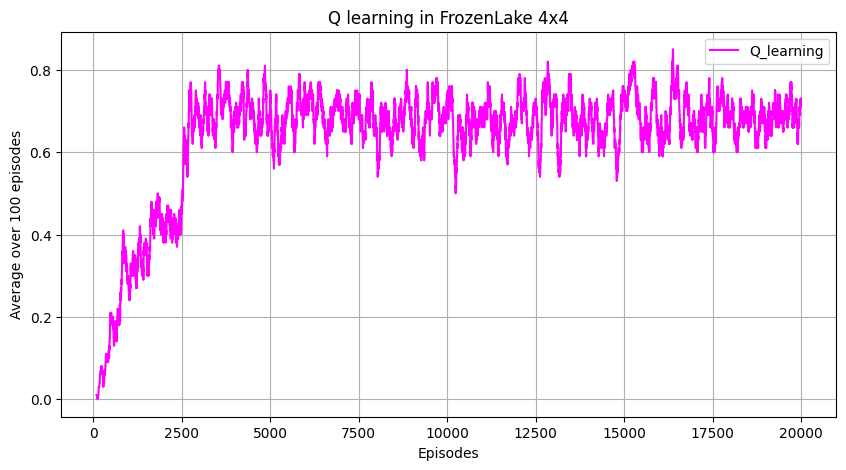

In [14]:
plot(100, rewardsQ1, 'Q_learning', title='Q learning in FrozenLake 4x4')

# Sarsa

In [15]:
def Sarsa(env, num_episodes, num_steps_per_episode, learning_rate, gamma, max_epsilon, min_epsilon, epsilon_decay_rate):
    start = time.time()
    q_table = np.zeros((env.observation_space.n, env.action_space.n))
    rewards_all = []
    for episode in range(num_episodes):
        state, _ = env.reset()

        reward_episode = 0.0
        done = False
        epsilon = min_epsilon + (max_epsilon - min_epsilon) * np.exp(-epsilon_decay_rate*episode)
        exploration = random.uniform(0,1)
        if exploration < epsilon: action = env.action_space.sample()
        else: action = np.argmax(q_table[state, :])

        for step in range(num_steps_per_episode):
            next_state, reward, terminated, truncated, _ = env.step(action)

            exploration = random.uniform(0,1)
            if exploration < epsilon: next_action = env.action_space.sample()
            else: next_action = np.argmax(q_table[next_state, :]) # a'

            q_table[state, action] = q_table[state, action] + learning_rate * (reward + gamma * q_table[next_state, next_action] - q_table[state, action])
            reward_episode += reward
            state, action = next_state, next_action
            if terminated or truncated: break

        rewards_all.append(reward_episode)
    end = time.time()
    print(f'Episode {episode} finished')
    return q_table, rewards_all, (end - start)

In [16]:
sarsa_table1, rewardsSarsa1, timeSarsa1 = Sarsa(env1,
                                                num_episodes,
                                                100,
                                                learning_rate,
                                                gamma,
                                                max_epsilon,
                                                min_epsilon,
                                                epsilon_decay_rate)

Episode 19999 finished


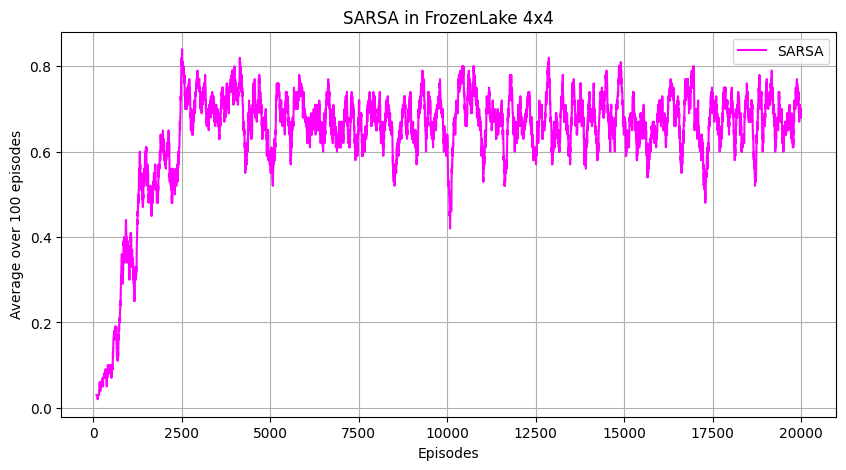

In [17]:
plot(100, rewardsSarsa1, 'SARSA', title='SARSA in FrozenLake 4x4')

In [18]:
print(f"Run time of Q learning: {timeQ1} s")
print(f"Run time of Sarsa: {timeSarsa1} s")

Run time of Q learning: 35.957558393478394 s
Run time of Sarsa: 28.278552770614624 s


# FrozenLake8x8-v1

In [19]:
env2 = gym.make('FrozenLake-v1', map_name="8x8", render_mode="rgb_array")

In [20]:
q_table2, rewardsQ2, timeQ2 = q_learning(env=env2,
                                 num_episodes=250000,
                                 num_steps_per_episode=400,
                                 learning_rate=0.1,
                                 gamma=0.99,
                                 max_epsilon=1.0,
                                 min_epsilon=0.001,
                                 epsilon_decay_rate=0.00005)

Episode 249999 finished


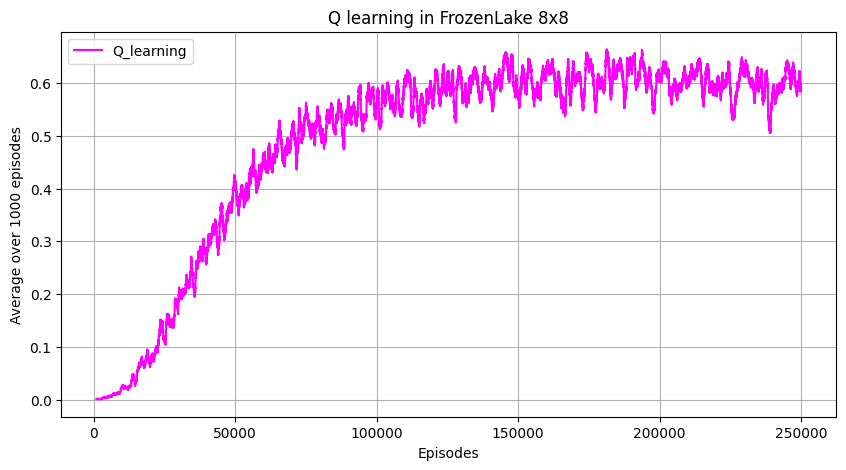

In [21]:
plot(1000, rewardsQ2, "Q_learning", title='Q learning in FrozenLake 8x8')

In [22]:
sarsa_table2, rewardsSarsa2, timeSarsa2 = Sarsa(env=env2,
                                 num_episodes=250000,
                                 num_steps_per_episode=400,
                                 learning_rate=0.1,
                                 gamma=0.99,
                                 max_epsilon=1.0,
                                 min_epsilon=0.001,
                                 epsilon_decay_rate=0.00005)

Episode 249999 finished


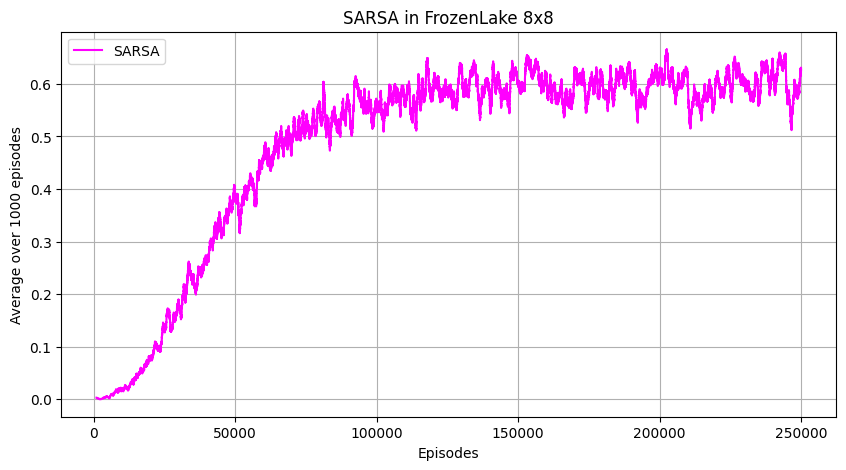

In [23]:
plot(1000, rewardsSarsa2, "SARSA", title='SARSA in FrozenLake 8x8')

In [24]:
print(f"Run time of Q learning: {timeQ2} s")
print(f"Run time of Sarsa: {timeSarsa2} s")

Run time of Q learning: 571.6673197746277 s
Run time of Sarsa: 379.1033444404602 s


# Taxi-v3

In [25]:
env3 = gym.make('Taxi-v3', render_mode="rgb_array")

In [26]:
q_table3, rewardsQ3, timeQ3 = q_learning(env=env3,
                                 num_episodes=10000,
                                 num_steps_per_episode=50,
                                 learning_rate=0.1,
                                 gamma=0.99,
                                 max_epsilon=1.0,
                                 min_epsilon=0.01,
                                 epsilon_decay_rate=0.005)

Episode 9999 finished


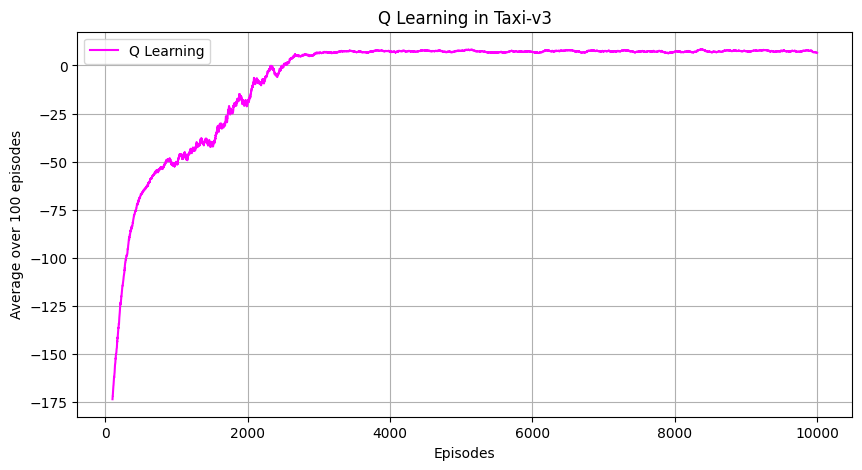

In [27]:
plot(100, rewardsQ3, "Q Learning", title="Q Learning in Taxi-v3")

In [28]:
sarsa_table3, rewardsSarsa3, timeSarsa3 = Sarsa(env=env3,
                                 num_episodes=10000,
                                 num_steps_per_episode=50,
                                 learning_rate=0.1,
                                 gamma=0.99,
                                 max_epsilon=1.0,
                                 min_epsilon=0.01,
                                 epsilon_decay_rate=0.005)

Episode 9999 finished


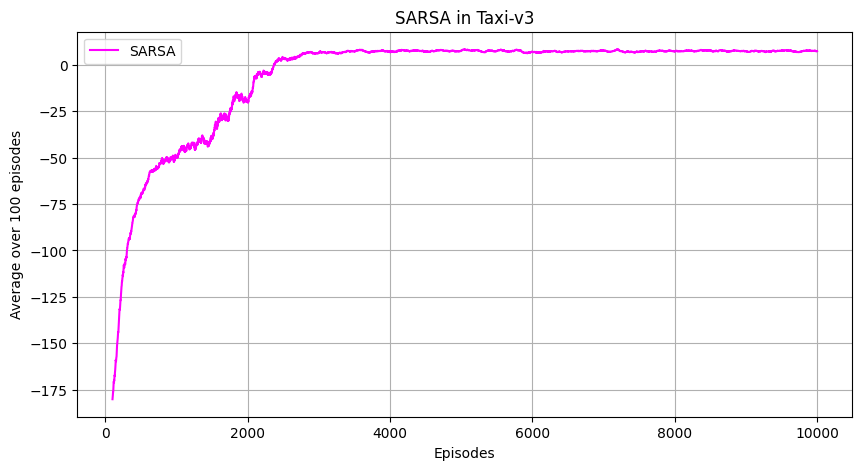

In [29]:
plot(100, rewardsSarsa3, "SARSA", title="SARSA in Taxi-v3")

In [30]:
print(f"Run time of Q learning: {timeQ3} s")
print(f"Run time of Sarsa: {timeSarsa3} s")

Run time of Q learning: 8.916060209274292 s
Run time of Sarsa: 5.98848032951355 s


# Biểu đồ và So sánh

In [31]:
print("----------Frozen Lake 4x4-------------")
print("Q learning: ")
play_multiple_times(env1, q_table1, 1000)
print(f"Run time of Q learning: {timeQ1} s")
print("SARSA: ")
play_multiple_times(env1, sarsa_table1, 1000)
print(f"Run time of Sarsa: {timeSarsa1} s")

print("----------Frozen Lake 8x8-------------")
print("Q Learning: ")
play_multiple_times(env2, q_table2, 1000)
print(f"Run time of Q learning: {timeQ2} s")
print("SARSA: ")
play_multiple_times(env2, sarsa_table2, 1000)
print(f"Run time of Sarsa: {timeSarsa2} s")

print("----------Taxi-v3-------------")
print("Q learning: ")
play_multiple_times(env3, q_table3, 1000)
print(f"Run time of Q learning: {timeQ3} s")
print("SARSA: ")
play_multiple_times(env3, sarsa_table3, 1000)
print(f"Run time of Sarsa: {timeSarsa3} s")

----------Frozen Lake 4x4-------------
Q learning: 
Number of successes: 733/1000
Average number of steps: 38.17598908594816
Run time of Q learning: 35.957558393478394 s
SARSA: 
Number of successes: 744/1000
Average number of steps: 38.159946236559136
Run time of Sarsa: 28.278552770614624 s
----------Frozen Lake 8x8-------------
Q Learning: 
Number of successes: 625/1000
Average number of steps: 62.2704
Run time of Q learning: 571.6673197746277 s
SARSA: 
Number of successes: 602/1000
Average number of steps: 64.01827242524917
Run time of Sarsa: 379.1033444404602 s
----------Taxi-v3-------------
Q learning: 
Number of successes: 1000/1000
Average number of steps: 13.031
Run time of Q learning: 8.916060209274292 s
SARSA: 
Number of successes: 1000/1000
Average number of steps: 12.997
Run time of Sarsa: 5.98848032951355 s


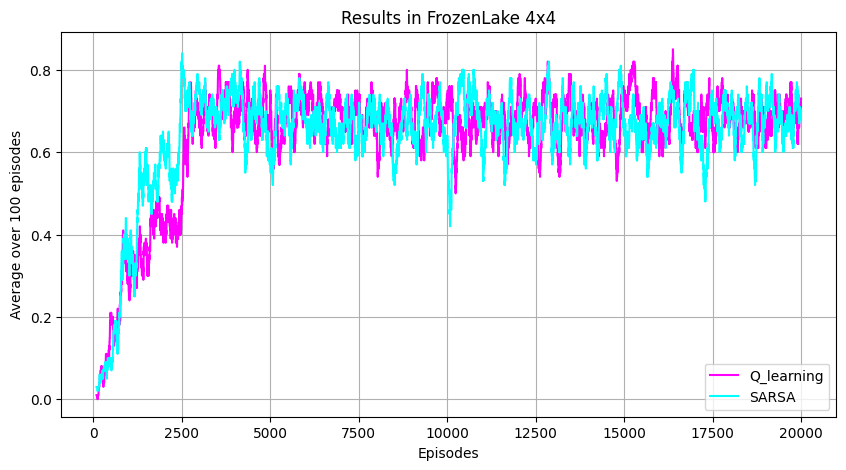

In [32]:
plot(100, rewardsQ1, "Q_learning", rewardsSarsa1, "SARSA", title='Results in FrozenLake 4x4')

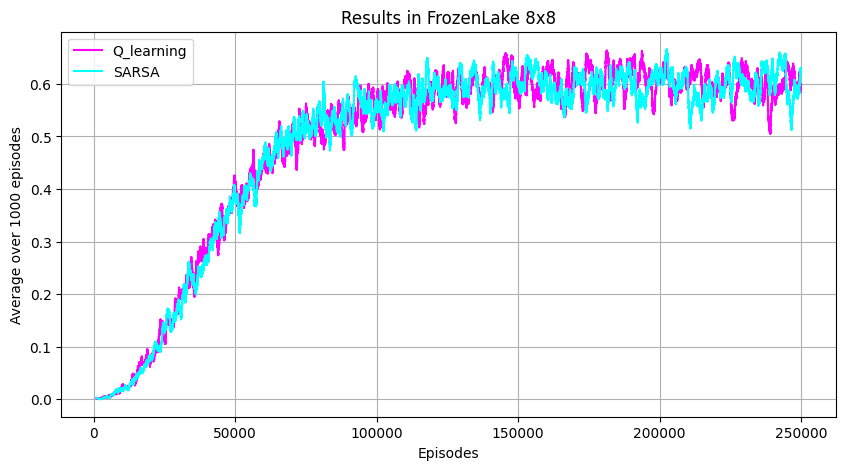

In [33]:
plot(1000, rewardsQ2, "Q_learning", rewardsSarsa2, "SARSA", title='Results in FrozenLake 8x8')

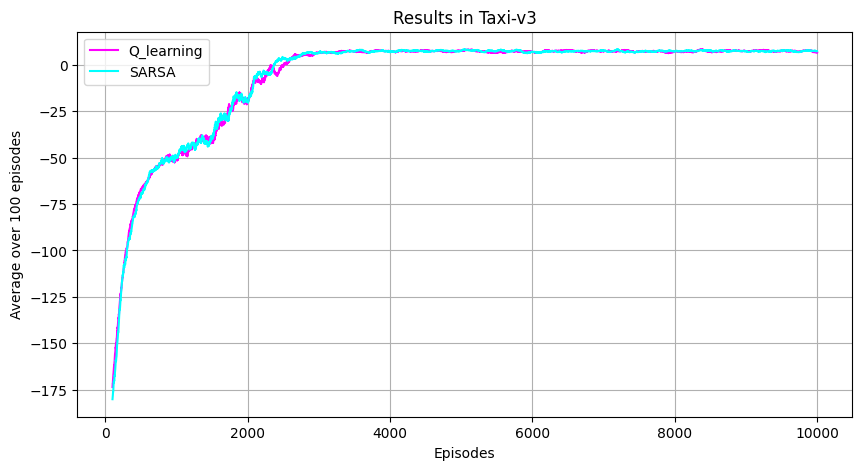

In [34]:
plot(100, rewardsQ3, "Q_learning", rewardsSarsa3, "SARSA", title='Results in Taxi-v3')

## Nhận xét

SARSA dường như vượt trội hơn Q learning về mặt số lần thành công, số bước trung bình cần thiết, và thời gian chạy trong các map trên.
Do SARSA có thể ổn định hơn Q-learning vì nó cập nhật on-policy giá trị hành động dựa trên chính sách thực tế mà chúng ta đang sử dụng.

Ở map FrozenLake 8x8, cả 2 thuật toán đều gặp khó khăn và cần phải thay đổi tham số để giải quyết. Trong đó:
* num_episodes: 20000 => 250000
* num_steps_per_episode: 100 => 400
* min_epsilon: 0.01 => 0.001
* epsilon_decay_rate: 0.05 => 0.00005